<a href="https://colab.research.google.com/github/gizattos/Consumo-de-cerveja-regressao/blob/master/Predicao_quantidade_cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utilizando o dataset "Beer Consumption - São Paulo" crie um modelo para prever a quantidade de cerveja que será consumida, para esse trabalho, desconsidere a variável independente 'data'. Discuta sobre a tarefa, o dataset, valores nulos, feature engineering, escolha do modelo, métrica de erro, complexidade vs erro, overfitting e underfitting.

In [0]:
## importando bibliotecas
import pandas as pd
import sklearn
#from sklearnimport DecisionTreeClassifier
from sklearn import tree
#tree.DecisionTreeClassifier()
from sklearn.model_selection import train_test_split

<h2>Lendo CSV</h2>

In [0]:
df = pd.read_csv('/content/Consumo_cerveja.csv')

<h2>Explorando e realizando o pré-processamento dos dados</h2>

In [5]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [0]:
## dropando linhas que possuem todos seus valores zerados	
df.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)

In [8]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [17]:
## Visualizando se o dataset possui dados faltantes
df.isna().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [10]:
## Visualizando informações estatísticas sobre as variáveis  
df.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [0]:
## alterando variáveis string para float e alterando separados de casa decimal
lista = ['Temperatura Media (C)','Temperatura Minima (C)','Temperatura Maxima (C)','Precipitacao (mm)']
for x in lista:
  df[x] = df[x].str.replace(',', '.').astype('float')
  

In [0]:
## alterando data para datetime
df['Data'] = pd.to_datetime(df['Data'])

In [26]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467


In [20]:
## verificando a correlação entre as variáveis
df.corr()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


In [0]:
#  Feature Engineering
#  criando nova coluna com o dia da semana 
#  Segunda-feira : 0
#  Terça-feira : 1
#  Quarta-feira : 2
#  Quinta-Feira : 3
#  Sexta-feira : 4
#  Sábado : 5
#  Domingo : 6
df['dia_semana'] =  df['Data'].dt.dayofweek

In [28]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),dia_semana
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,3
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,4
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,5
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,6
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,0
...,...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307,6
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095,0
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309,1
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467,2


dia_semana
0    23.609635
1    24.355154
2    23.810385
3    24.076547
4    24.137885
5    28.837923
6    29.007519
Name: Consumo de cerveja (litros), dtype: float64


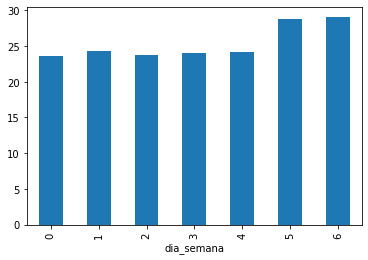

In [40]:
## qual dia se tem a maior média de cervaja ?
df.groupby(['dia_semana'])['Consumo de cerveja (litros)'].mean().plot(kind='bar')
print(df.groupby(['dia_semana'])['Consumo de cerveja (litros)'].mean())    


<h2>Algoritmo e predição - Regressão</h2>
<h3>Pela variável Target ser númerica contínua, não utilizaremos classificação e sim regressão </h3>